In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

##### 1. Titanic

In [3]:
titanic = sns.load_dataset("titanic")  
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
dt = titanic.pivot_table('survived','embark_town','sex')*100
dt

sex,female,male
embark_town,,
Cherbourg,87.671233,30.526316
Queenstown,75.000000,7.317073
Southampton,68.965517,17.460317


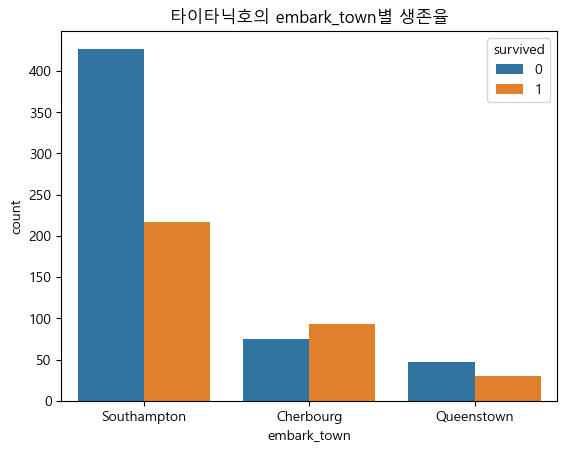

In [5]:
sns.countplot(x='embark_town', hue='survived', data=titanic)
plt.title('타이타닉호의 embark_town별 생존율')
plt.show()

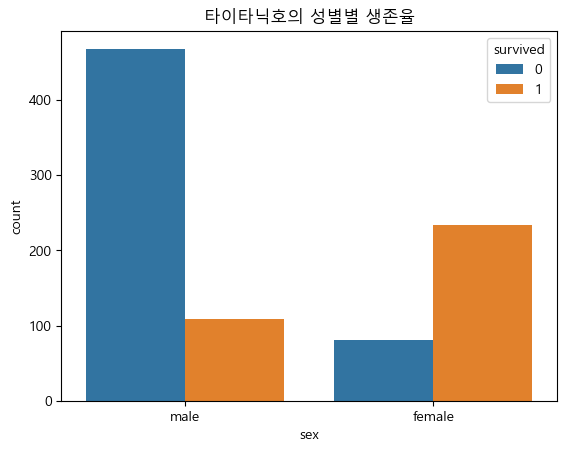

In [6]:
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('타이타닉호의 성별별 생존율')
plt.show()

In [7]:
dt = titanic.pivot_table('survived','embark_town','sex','count')
dt

sex,female,male
embark_town,,
Cherbourg,73,95
Queenstown,36,41
Southampton,203,441


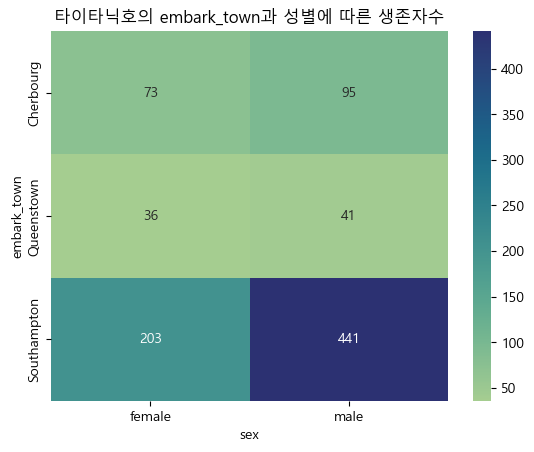

In [8]:
sns.heatmap(dt, cmap='crest', annot=True, fmt="d")
plt.title('타이타닉호의 embark_town과 성별에 따른 생존자수');

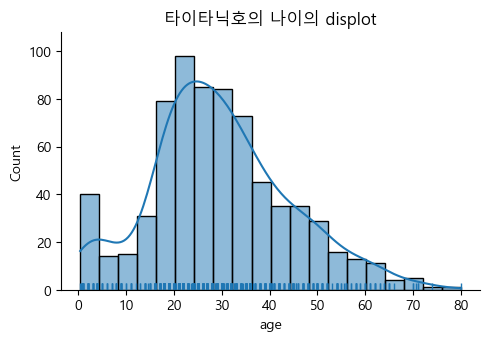

In [9]:
fig = sns.displot(x='age', data = titanic, kde=True, rug=True)
fig.fig.set_size_inches(5,3)
plt.title('타이타닉호의 나이의 displot')
plt.show()

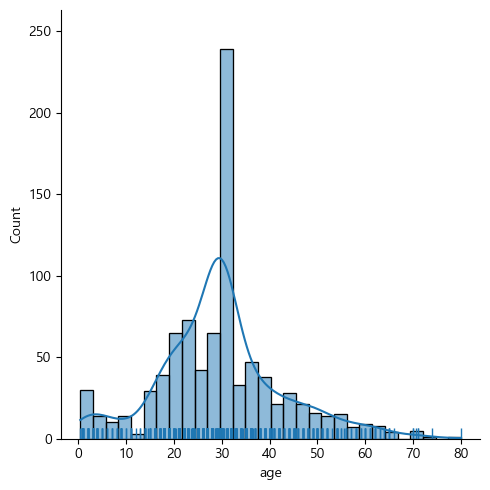

In [17]:
# 결측치를 평균으로 대체
titanic.age.fillna(titanic.age.mean(), inplace=True)
sns.displot(x='age', data = titanic, kde=True, rug=True);

##### 2. CCTV

In [10]:
filename = 'data/서울시 자치구 년도별 CCTV 설치 현황_221231기준.csv'
columns = '구분,총계'.split(',')
cctv = pd.read_csv(filename, encoding='euc=kr', thousands=',')
cctv = cctv[columns]
cctv.head()

,구분,총계
0,계,91341
1,종로구,1980
2,중 구,2584
3,용산구,2847
4,성동구,4047


In [11]:
cctv.drop([0], inplace=True)
cctv.head(3)

,구분,총계
1,종로구,1980
2,중 구,2584
3,용산구,2847


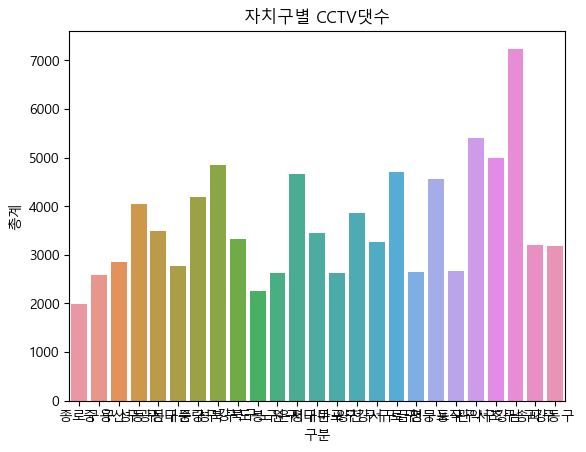

In [12]:
sns.barplot(x='구분', y='총계', data=cctv)
plt.title('자치구별 CCTV댓수');

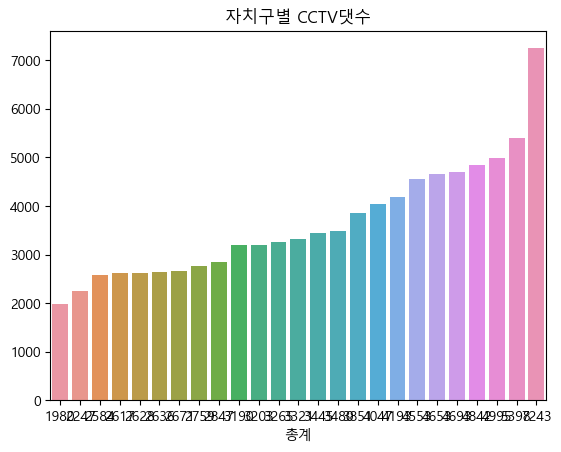

In [14]:
sns.barplot(x=si.index, y=si.values, data=si)
plt.title('자치구별 CCTV댓수');

In [15]:
sv = cctv.총계.sort_values()
sv.head()

1     1980
10    2247
2     2584
11    2617
14    2628
Name: 총계, dtype: int64

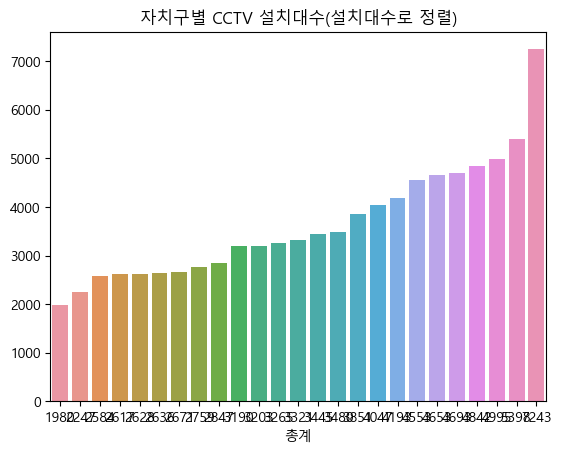

In [16]:
sns.barplot(x=sv.index, y=sv.values, data=sv)
plt.title('자치구별 CCTV 설치대수(설치대수로 정렬)')
plt.show()

In [21]:
si = cctv.sort_values(by='자치구')
sns.barplot(x='총계',y='자치구',data=si)
plt.title('자치구별 CCTV 설치대수(자치구명으로 정렬)');

KeyError: '자치구'

In [ ]:
sv = cctv.sort_values()